# IT44 TP3: Courbes de Bezier et B-splines
---

<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='bezier.png'  width="500px">       
    </tr>
</table>
Dans ce TP vous allez travailler sur l'algorithme de de Casteljau pour tracer des courbes de Bézier et tracer également des fonctions B-splines.

## Algorithme de de Casteljau

Ecrire un fonction ```Casteljau(P_0,..,P_n,t)``` s'appuyant sur l'algorithme de de Castejau qui étant donnée un polygone de contrôle ${\bf P}=(P_0,\dots, P_n)$ et étant donné un temps $t\in [0,1]$, calcule les coordonnées de $P_n ^n(t)$.

In [108]:
import matplotlib.pyplot as plt
import numpy as np

In [109]:
def deCasteljau(points,t):
    if len(points) == 1 : return points[0]
    else :
        new_points = []
        for i in range(len(points)-1):
            x = (1-t)*points[i][0] + t*points[i+1][0]
            y = (1-t)*points[i][1] + t*points[i+1][1]
            new_points.append([x,y])
        return deCasteljau(new_points,t)

In [110]:
p10 = [2,0]
p11 = [1, 1]
p12 = [0, 1]
p13 = [-1, 1]

points2 = [p10, p11, p12, p13]

deCasteljau(points2, 1/2)

[0.5, 0.875]

## Tracé d'une courbe de Bézier

Utiliser la fonction précédente pour tracer des exemples de courbes de Bézier pour des polygones de contrôle de votre choix.



In [111]:
def bezier(points):
    t = 0
    x, y = [], []
    while (t <= 1):
        x.append(deCasteljau(points,t)[0])
        y.append(deCasteljau(points,t)[1])
        t+=0.001
    plt.title("Courbe de Bézier")
    plt.plot(*zip(*points), 'ro--', label='Polygone de contrôle')
    plt.plot(x, y,'b-', label='Courbe de Bézier')
    plt.legend()

    plt.show()

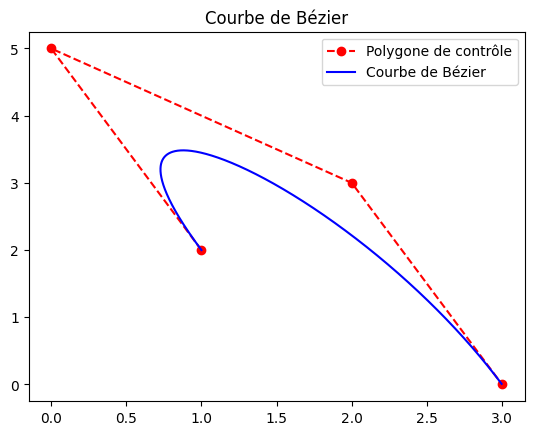

In [112]:
p0 = [1,2]
p1 = [0,5]
p2 = [2,3]
p3 = [3,0]
points = [p0,p1,p2,p3]

bezier(points)




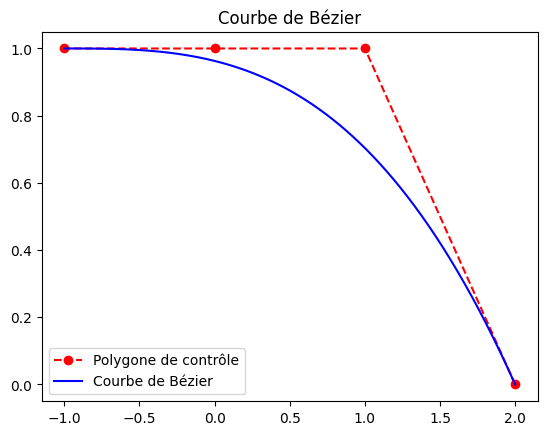

In [113]:
p10 = [2,0]
p11 = [1, 1]
p12 = [0, 1]
p13 = [-1, 1]

points2 = [p10, p11, p12, p13]

bezier(points2)

## Tracé d'une courbe de Bézier via les polynôme de Bernstein


On admet la relation suivante entre les polynômes de la base de Bernstein $B_i ^n$, $i=0,\dots,n$ et la base canonique de $\mathbb{R}_n[x]$, $1,x,x^2,\dots,x^n$.
<table style="background: white;">
    <tr style="background: white;">
        <td> <img src='bernstein.svg'  width="500px">       
    </tr>
</table>

Etant donné un polygone de contrôle ${\bf P}=(P_0,\dots,P_n)$ et un temps $t\in [0,1]$, écrire deux fonctions qui expriment les polynômes $x(t)$ et $y(t)$ dans la base canonique (votre fonction pourra produire un vecteur pour les coefficients de $x$ et un vecteur pour les coefficients de $y$).

Utiliser cette construction pour tracer la courbe paramétrée $\gamma(t)=(x(t),y(t)$ en utilisant l'algorithme de Horner.

Comparer les temps d'exécution du tracé avec la méthode de de Casteljau.

In [114]:
import math

def bernstein(m, i):
    """
    Retourne un polynome de Bernstein sous forme de coefficients [a0, a1,..., am] dans la base canonique
    """
    res = np.zeros(m+1)
    m_i = math.comb(m, i)
    for k in range(m - i + 1):
        res[i+k] += m_i * math.comb(m - i, k) * (-1)**k 
    return res

print(bernstein(3, 0)) # on attend (1-x)^3 = 1 - 3x + 3x^2 - x^3 

def param(points):
    """
    retourne les polynomes x(t) et y(t)
    """
    m = len(points) - 1
    param_x = np.zeros(m+1)
    param_y = np.zeros(m+1)
    for i in range(m+1):
        bern = bernstein(m, i)
        for j in range(m+1):
            param_x[j] += bern[j] * points[i][0]
            param_y[j] += bern[j] * points[i][1]
        
    return param_x, param_y

def horner(p, x):
    """
    retourne la valeur du polynome p évalué en x
    """
    n = len(p)
    val = p[n-1]
    for i in range(n-2, -1, -1):
        val=val*x+p[i]
    return val

def gamma(x, y):
    """
    trace la courbe de bézier a partir de gamma
    """
    t = np.linspace(0, 1, 1000)
    X,Y = [], []
    for el in t:
        X.append(horner(x, el))
        Y.append(horner(y, el))
    print(*zip(*points))
    plt.plot(*zip(*points), 'ro--', label='Polygone de contrôle')
    plt.plot(X, Y, 'b-', label='Courbe de Bézier')
    plt.title('Courbe de Bézier avec Horner')
    plt.legend()
    plt.show()


[ 1. -3.  3. -1.]


(1, 2, 4, 3) (1, 3, 3, 0)


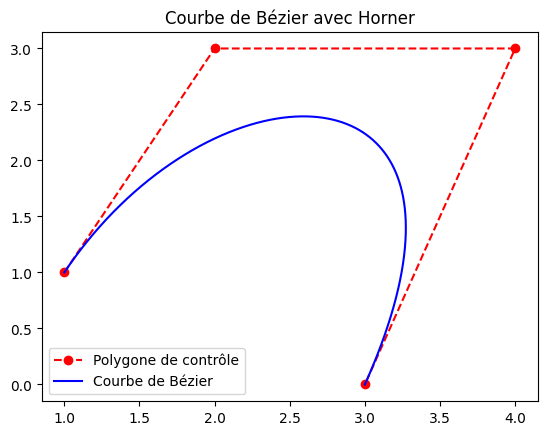

In [115]:
points = [(1, 1), (2, 3), (4, 3), (3, 0)]

px, py = param(points)

gamma(px, py)

## Comparaison des temps d'exécution

#### Sans tracé

In [116]:
# ---- Mesurer uniquement le calcul (sasn le plot)----
import time

points = [(1, 1), (2, 3), (4, 3), (3, 0)]

# ---- Horner ----
start_horner = time.time()
px, py = param(points)
t_vals = np.linspace(0, 1, 1000)
x_vals = [horner(px, t) for t in t_vals]
y_vals = [horner(py, t) for t in t_vals]
end_horner = time.time()
total_horner = end_horner - start_horner

# ---- Casteljau ----
start_castel = time.time()
x2, y2 = [], []
for t in t_vals:
    x, y = deCasteljau(points, t)
    x2.append(x)
    y2.append(y)
end_castel = time.time()
total_castel = end_castel - start_castel


print(f"Horner: {total_horner:.6f} s")
print(f"Casteljau: {total_castel:.6f} s")

print(f"\nHorner est { total_castel / total_horner:.6f} plus rapide que de Casteljau")

Horner: 0.001052 s
Casteljau: 0.003010 s

Horner est 2.861287 plus rapide que de Casteljau


#### Avec tracé

(1, 2, 4, 3) (1, 3, 3, 0)


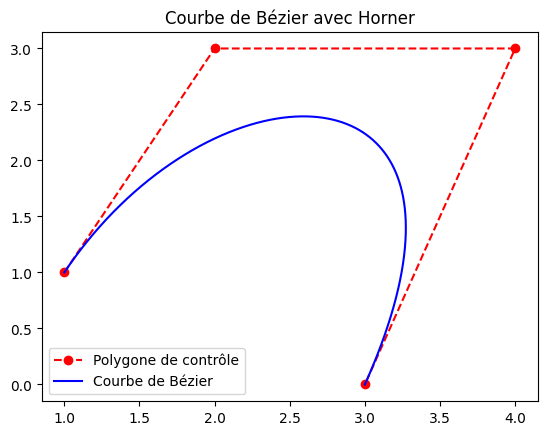

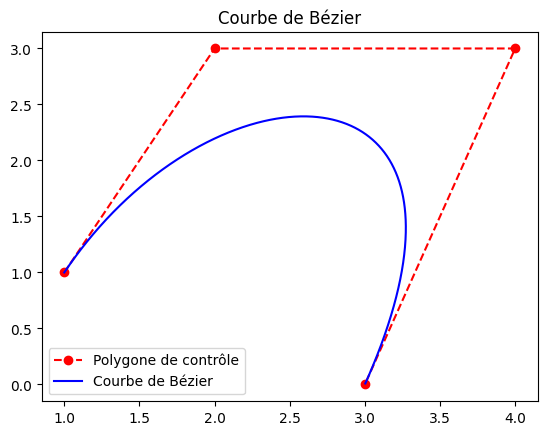

Temps pour Horner : 0.057493
Temps pour de Casteljau : 0.082664

Horner est 1.437811 plus rapide que de Casteljau


In [130]:
# ----- HORNER ---------
start_horner = time.time()
px, py = param(points)
gamma(px, py)
end_horner = time.time()
total_horner = end_horner - start_horner

# ------ de Casteljau ------
start_castel = time.time()
bezier(points)
end_castel = time.time()
total_castel = end_castel - start_castel

print(f"Temps pour Horner : {total_horner:.6f}")
print(f"Temps pour de Casteljau : {total_castel:.6f}")


print(f"\nHorner est { total_castel / total_horner:.6f} plus rapide que de Casteljau")

## Fonction B-splines

Ecrire une fonction qui étant donnée un vecteur noeud $\tau=(t_0,\dots, t_m)$ et le choix d'un degré $k$ calcule les fonction B-splines $B_{i,k}$ pour $k=0,\dots,m-k-1$.

Donner des représentations graphiques des fonctions B-splines associées à un noeuds donné

In [118]:
def w(x, i, j, tau):
    """
    Calcule w_i,j (x) pour le vecteur noeud `tau`
    """
    if tau[i] < tau[i + j]:
        return (x - tau[i]) / (tau[i + j]-tau[i])
    else:
        return 0

In [119]:
def b(x, i, k, tau):
    """
    Calcule B_i,k (x) pour le vecteur noeud `tau`
    """
    if k == 0:
        return 1 if tau[i] <= x < tau[i + 1] else 0
    else:
        w1 = w(x, i, k, tau)
        w2 = w(x, i + 1, k, tau)
        return w1 * b(x, i, k - 1, tau) + (1 - w2) * b(x, i + 1, k - 1, tau)
    
    

In [120]:
b(2, 1, 2, [0, 1, 2, 2, 4])

1.0

In [121]:
def plot_bspline(i, k, tau):
    x = np.linspace(tau[0], tau[-1], 100)


    for deg in k:
        y = [b(val, i, deg, tau) for val in x]
        plt.plot(x, y, label=f'$B_{{{i},{deg}}}(x)$')

    plt.title(f"Fonctions B-Spline pour tau={tau}")
    plt.xlabel('x')
    plt.ylabel('B(x)')
    plt.legend()
    plt.show()

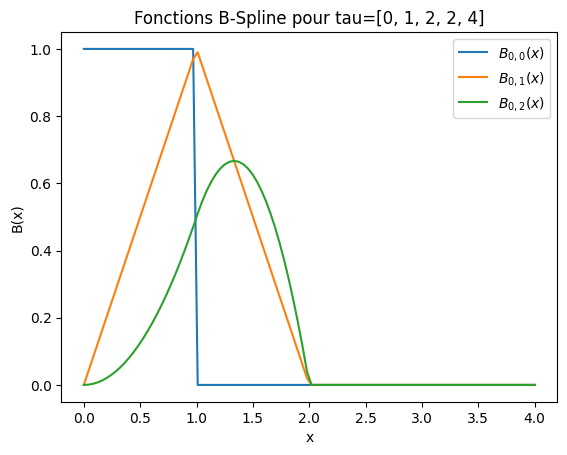

In [122]:
plot_bspline(0, [0, 1, 2], [0,1,2,2,4])

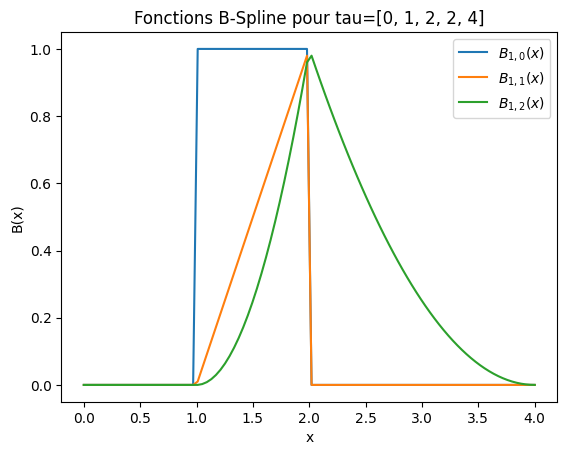

In [123]:
plot_bspline(1, [0, 1, 2], [0,1,2,2,4])

# TD 3 : exercice 1 

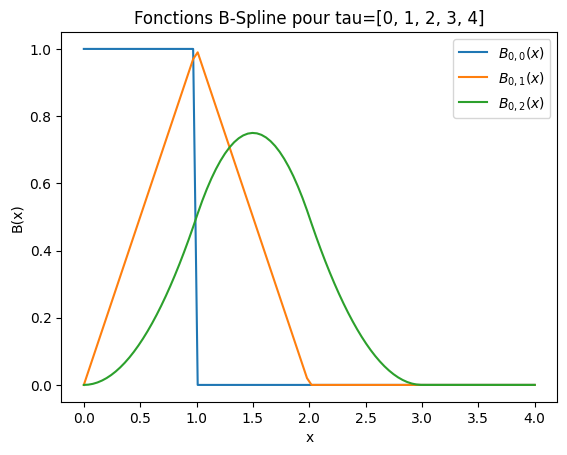

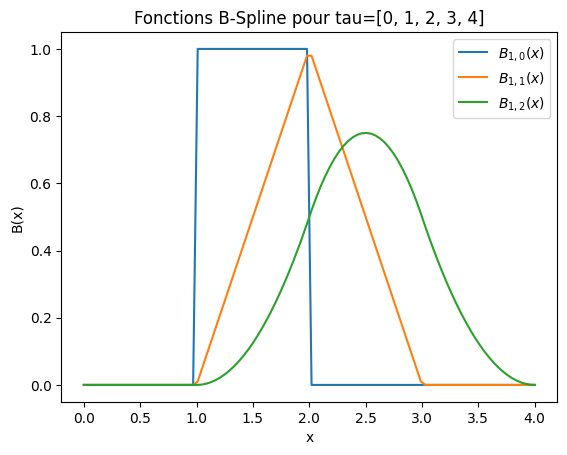

In [124]:
plot_bspline(0, [0, 1, 2], [0, 1, 2, 3, 4])
plot_bspline(1, [0, 1, 2], [0, 1, 2, 3, 4])